### Objective:
- The objective from this task is to use your NLP skills to build a ML model can <b>classify the news categories</b>.
- Try hard to get the maximum value of the preferable evaluation metric using any technique.
- <b>Concat headlines and short descriptions</b> and use them in classification. 

### Time:
- This task mustn't take more than <b>3 hours</b>.
    - Load Data and EDA : 30 minutes
    - Cleaning and Preprocessing : 60 Minutes
    - Modelling and Enhancement : 60 Minutes
    - Extratime : 30 minutes

### Fixed Rules:
- train test split 80% : 20%
- all random seeds = 42

# Delivery:
## Through this [form](https://forms.gle/PshJQw2bTa48Ligz7)

> ### Take a deep breath, read the instructions again, and then start

## Load Libraries

In [ ]:
# !pip install Unidecode

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import re
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# from unidecode import unidecode
from tqdm import tqdm

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords


import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D , Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU , Bidirectional , Dropout



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load Dataset

In [2]:
dataset = pd.read_json('/content/Dataset.json',lines=True)
dataset

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


## EDA

In [4]:
dataset.shape

(200853, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [6]:
dataset.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [7]:
dataset.duplicated().sum()


13

In [8]:
dataset[dataset.duplicated()]

,category,headline,authors,link,short_description,date
59003,POLITICS,"On Facebook, Trump's Longtime Butler Calls For...",,https://www.huffingtonpost.comhttp://www.mothe...,"Anthony Senecal, who worked as Donald Trump's ...",2016-05-12
59249,TECH,Former Facebook Workers: We Routinely Suppress...,,https://www.huffingtonpost.comhttp://gizmodo.c...,Facebook workers routinely suppressed news sto...,2016-05-09
61565,WOMEN,"On Equal Pay Day, The Gap Is Still Too Wide",,https://www.huffingtonpost.comhttp://www.cnbc....,Equal Pay Day falls on April 12 in 2016. It's ...,2016-04-12
131156,WELLNESS,The World's Most Dangerous Workout?,,https://www.huffingtonpost.comhttp://www.cnn.c...,"Is the ""sport of fitness"" the world's most dan...",2014-02-10
135735,WELLNESS,Some People Call It 'The Best Anti-Smoking Ad ...,,https://www.huffingtonpost.comhttp://www.upwor...,Almost all smokers know cigarettes are bad for...,2013-12-22
136468,ENVIRONMENT,10 Cities That Could Run Out Of Water - Weathe...,,https://www.huffingtonpost.comhttp://www.weath...,"Securing access to plentiful, renewable source...",2013-12-15
169481,TECH,Google Is Attacking Apple From The Inside Out ...,,https://www.huffingtonpost.comhttp://www.busin...,After years of hammering away at Apple's share...,2013-01-01
178655,WELLNESS,"Eating For Health, Not Weight",,https://www.huffingtonpost.comhttp://www.nytim...,Almost half of Americans are on a diet -- not ...,2012-09-23
185922,TECH,Apple Removes Green EPEAT Electronics Certific...,,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple has pulled its products off the U.S. gov...,2012-07-07
185924,TECH,Microsoft's $6.2 Billion Writedown Shows It's ...,,https://www.huffingtonpost.comhttp://www.theda...,Fighting for online advertising dominance with...,2012-07-07


In [11]:
print("number of unique categories : ",dataset.category.value_counts().count())

number of unique categories :  41


In [12]:
dataset.category.value_counts()


POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

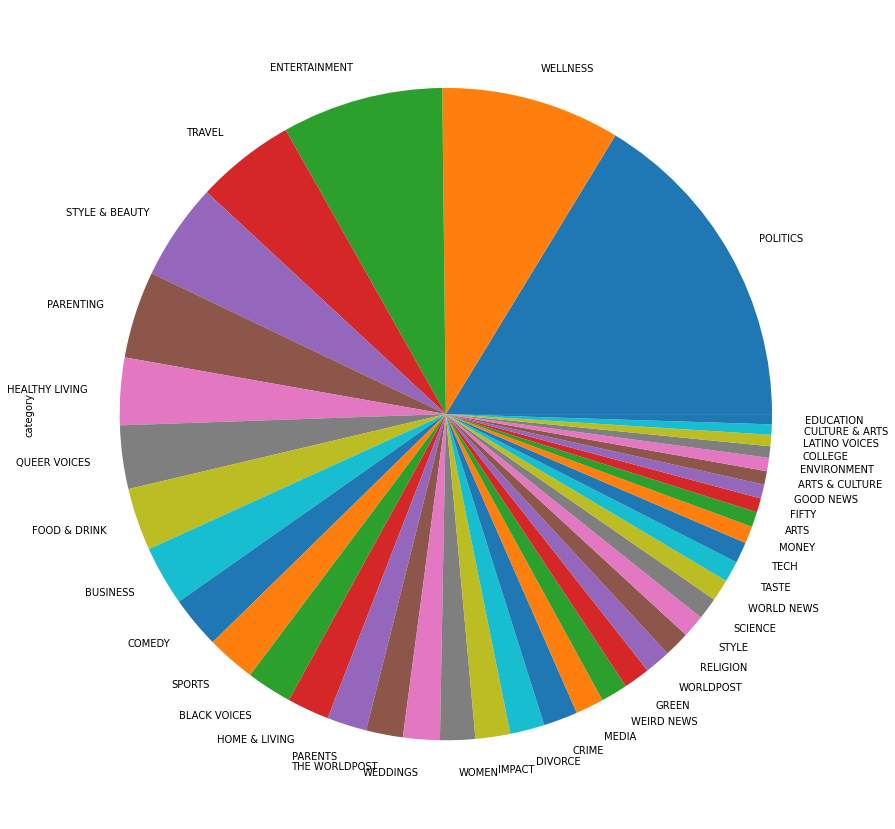

In [18]:
dataset.category.value_counts().plot(kind='pie',figsize=(15, 15))

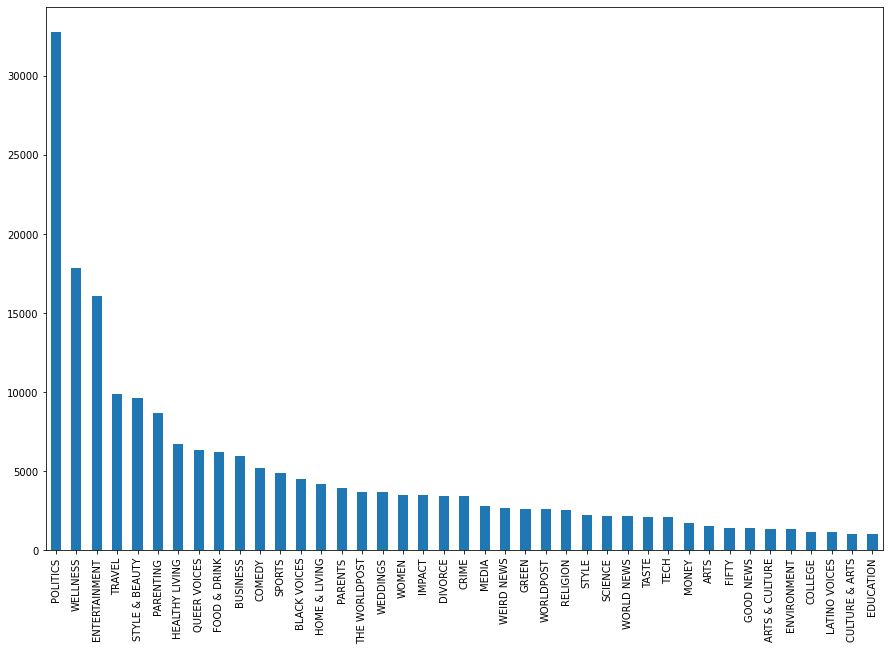

In [20]:
dataset.category.value_counts().plot(kind='bar',figsize=(15, 10))

In [21]:
for i in range(15):
  ctr = random.randint(0,31961)
  print(dataset['headline'].iloc[ctr])
  print(dataset['short_description'].iloc[ctr])
  print("*"*50)

Nunavut’s Capital Aims To Curb Alcoholism By Liberalizing Access
Opening a beer and wine store isn’t an obvious approach to addressing a community’s devastating relationship with drinking
**************************************************
Only About A Third Of Republicans Believe Voting Should Be As Easy As Possible
There's also a gap in attitudes toward voter access along racial lines.
**************************************************
'Despacito' Is Officially The Most Streamed Song Of All Time
This song is taking over the world, des-pa-citooo.
**************************************************
See Juliette Binoche In 'Let The Sunshine In,' The French Version Of A Nancy Meyers Movie
Claire Denis directed this romance about a dissatisfied artist seeking love.
**************************************************
Kris Kobach Just Got Torched By A Federal Judge In Kansas Vote Trial
At the trial over requiring proof of citizenship to vote, the state official's missteps on evidence draw rebu

## Cleaning & Preprocessing

#### prepare Dataset

- concat 2 columns (headlines and short_description ) to create feature column (text)


In [3]:
dataset['text'] = dataset['headline'] + ' ' +  dataset['short_description']
dataset

,category,headline,authors,link,short_description,date,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...


- double check that 2 columns concat correctly

In [23]:
for i in range(5):
  ctr = random.randint(0,31961)
  print(dataset['headline'].iloc[ctr])
  print(dataset['short_description'].iloc[ctr])
  print(dataset['text'].iloc[ctr])
  print("*"*50)

What Will We Do? A Faithful Response To Poverty In Advent
Did you ever have one of those bracelets that said “What Would Jesus Do?” Maybe a bumper sticker? Did you get the T-shirt
What Will We Do? A Faithful Response To Poverty In Advent Did you ever have one of those bracelets that said “What Would Jesus Do?” Maybe a bumper sticker? Did you get the T-shirt
**************************************************
Tuesday's Morning Email: Inside Trump's Rollback Of Obama's Climate Change Legacy
Environmentalists vowed to fight the policy reversal.
Tuesday's Morning Email: Inside Trump's Rollback Of Obama's Climate Change Legacy Environmentalists vowed to fight the policy reversal.
**************************************************
The Rainbow Letters: Sharing The Stories Of LGBTQ Families
I wish I had known more families like my own — been reassured from someone that everything would be better than okay in a few years.
The Rainbow Letters: Sharing The Stories Of LGBTQ Families I wish I had kn

In [5]:
df = dataset[['category','text']].copy()

- explore dataset

In [25]:
for i in range(15):
  ctr = random.randint(0,31961)
  print(df['text'].iloc[ctr])
  print("*"*50)

She Was The First Woman To Go Public About Nassar. Read Her Statement In Full. Rachael Denhollander publicly accused Nassar in 2016. In court on Wednesday, she was the last survivor to address him.
**************************************************
Netflix Acquires Seth Rogen's Mind And Body In April Fools' Gag "I should have read this before I signed it," the actor said.
**************************************************
Walk A Mile In A White Woman’s Shoes Tucker Carlson's simple avatar of oppressed whites in America is embarrassing.
**************************************************
Alton Sterling's Family Seeks Release Of Controversial Video, Evidence Court documents say one of the unreleased videos shows an officer involved in Sterling's fatal shooting shouting, "I'll kill you, b***h."
**************************************************
Texas Babysitter Coerced 4-Year-Old Boy To Perform Sex Acts On Her: Police Esmeralda Medellin, 18, has been arrested and charged with aggravated se

In [52]:
def check_tag(text):
  ctr = 0
  check = re.findall(r'@\S+', text, flags=re.MULTILINE)
  if len(check) == 1:
    ctr += 1 
  return ctr

counter =  df['text'].apply(check_tag)
counter.sum()

672

In [43]:
def check_url(text):
  ctr = 0
  check = re.findall(r'^https?:\/\/.[\r\n]', text, flags=re.MULTILINE)
  if len(check) == 1:
    ctr += 1 
  return ctr

counter =  df['text'].apply(check_url)
counter.sum()

0

In [44]:
def check_hastag(text):
  ctr = 0
  check = re.findall(r'#', text, flags=re.MULTILINE)
  if len(check) == 1:
    ctr += 1 
  return ctr

counter =  df['text'].apply(check_hastag)
counter.sum()

1202

In [45]:
def check_punc(text):
  ctr = 0
  check = re.findall(r'[^\w\s]+', text, flags=re.MULTILINE)
  if len(check) == 1:
    ctr += 1 
  return ctr

counter =  df['text'].apply(check_punc)
counter.sum()

16737

----

#### prepare & clean Dataset

- 1 remove duplicates
- 2 lower case
- 3 remove stop words
- 4 remove numbers
- 5 remove @ tag
- 6 remove hashtag
- 7 Lemmatizer

- remove duplicates

In [6]:
df = df.drop_duplicates()

# for double check 
df.duplicated().sum()

0

- make all words lowercase

In [11]:
df['text_cleaned'] = df['text'].apply(str.lower)
df

,category,text,text_cleaned
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,rim ceo thorsten heins' 'significant' plans fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,maria sharapova stunned by victoria azarenka i...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","giants over patriots, jets over colts among m..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,aldon smith arrested: 49ers linebacker busted ...


- remove numbers

In [12]:
def remove_numbers(text):
  text = re.sub(r'[0123456789]', '', text, flags=re.MULTILINE)
  return text

df['text_cleaned'] = df['text_cleaned'].apply(remove_numbers)
df

,category,text,text_cleaned
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,"there were mass shootings in texas last week,..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the ...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,hugh grant marries for the first time at age ...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,rim ceo thorsten heins' 'significant' plans fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,maria sharapova stunned by victoria azarenka i...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","giants over patriots, jets over colts among m..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,aldon smith arrested: ers linebacker busted fo...


- remove @ tag

In [13]:
def remove_tag(text):
  text = re.sub(r'@\S+', '', text, flags=re.MULTILINE)
  return text

df['text_cleaned'] = df['text_cleaned'].apply(remove_tag)
df

,category,text,text_cleaned
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,"there were mass shootings in texas last week,..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the ...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,hugh grant marries for the first time at age ...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,rim ceo thorsten heins' 'significant' plans fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,maria sharapova stunned by victoria azarenka i...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","giants over patriots, jets over colts among m..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,aldon smith arrested: ers linebacker busted fo...


In [53]:
# for double check only 
counter =  df['text_cleaned'].apply(check_tag)
counter.sum()

0

- remove hashtag

In [14]:
def remove_hashtag(text):
  text = re.sub(r'#', '', text, flags=re.MULTILINE)
  return text

df['text_cleaned'] = df['text_cleaned'].apply(remove_hashtag)
df

,category,text,text_cleaned
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,"there were mass shootings in texas last week,..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the ...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,hugh grant marries for the first time at age ...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,rim ceo thorsten heins' 'significant' plans fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,maria sharapova stunned by victoria azarenka i...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","giants over patriots, jets over colts among m..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,aldon smith arrested: ers linebacker busted fo...


In [55]:
# for double check only 
counter =  df['text_cleaned'].apply(check_hastag)
counter.sum()

0

In [15]:
df['text_cleaned']  = df['text_cleaned'].apply(lambda x: x.split())

- remove stopwords

In [16]:
stop_words = stopwords.words('english')
def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)
df

,category,text,text_cleaned
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,"[mass, shootings, texas, last, week,, tv, left..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,"[smith, joins, diplo, nicky, jam, world, cup's..."
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,"[hugh, grant, marries, first, time, age, actor..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[jim, carrey, blasts, 'castrato', adam, schiff..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"[julianna, margulies, uses, donald, trump, poo..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"[rim, ceo, thorsten, heins', 'significant', pl..."
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"[maria, sharapova, stunned, victoria, azarenka..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","[giants, patriots,, jets, colts, among, improb..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,"[aldon, smith, arrested:, ers, linebacker, bus..."


- Lemmatizer

In [17]:
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

df['text_cleaned'] = df['text_cleaned'].apply(lemmatize_words)
df

,category,text,text_cleaned
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,"[mass, shooting, texas, last, week,, tv, left,..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,"[smith, join, diplo, nicky, jam, world, cup's,..."
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,"[hugh, grant, marries, first, time, age, actor..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[jim, carrey, blast, 'castrato', adam, schiff,..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"[julianna, margulies, us, donald, trump, poop,..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"[rim, ceo, thorsten, heins', 'significant', pl..."
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"[maria, sharapova, stunned, victoria, azarenka..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","[giant, patriots,, jet, colt, among, improbabl..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,"[aldon, smith, arrested:, er, linebacker, bust..."


## Modelling

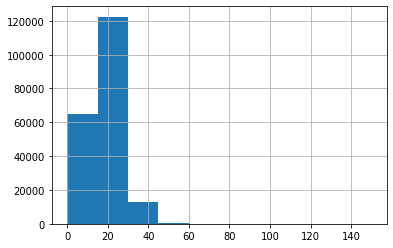

In [19]:
lens = df['text_cleaned'].apply(lambda x: len(x)) 
lens.hist()

In [24]:
max_sequence_len = 45
df['text_cleaned'] = df['text_cleaned'] .apply(lambda sent: sent[:max_sequence_len])

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['category_encode']= label_encoder.fit_transform(df['category'])
print(df['category_encode'].unique())
# for double check
print(df['category_encode'].value_counts().count())

[ 6 10 39 18 24 36  2 38  5 25 28  3 34 20 32 26 27 19  9  4 23  1 29 15
 31 16 33 14 40 12  0 37 22 17 30  8 35 13 21 11  7]
41


In [62]:
y = df['category_encode']

In [63]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y)
print(train_labels.shape)

(200383, 41)


In [64]:
text = df['text_cleaned'].values

In [65]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(text)
vocab_size = len(tokenizer.word_index) + 1
print('vocab size: ', vocab_size)
sequences = tokenizer.texts_to_sequences(text)
text_pad = pad_sequences(sequences, maxlen=max_sequence_len, truncating='post', padding='post')

vocab size:  224160


In [66]:
x_train, x_test, y_train, y_test = train_test_split(text_pad, train_labels, stratify=train_labels, test_size=0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(160306, 45) (40077, 45)
(160306, 41) (40077, 41)


- LSTM

In [115]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 128))
model.add(layers.LSTM(100))
model.add(layers.Dense(41, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 128)         28692480  
                                                                 
 lstm_16 (LSTM)              (None, 100)               91600     
                                                                 
 dense_25 (Dense)            (None, 41)                4141      
                                                                 
Total params: 28,788,221
Trainable params: 28,788,221
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
hist = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.15
)

Epoch 1/5
533/533 [==============================] - 15s 24ms/step - loss: 2.7984 - accuracy: 0.2733 - val_loss: 2.3384 - val_accuracy: 0.3705
Epoch 2/5
533/533 [==============================] - 12s 23ms/step - loss: 1.9526 - accuracy: 0.4707 - val_loss: 1.9506 - val_accuracy: 0.4878
Epoch 3/5
533/533 [==============================] - 13s 24ms/step - loss: 1.3852 - accuracy: 0.6177 - val_loss: 1.8587 - val_accuracy: 0.5175
Epoch 4/5
533/533 [==============================] - 12s 23ms/step - loss: 0.9919 - accuracy: 0.7228 - val_loss: 1.9538 - val_accuracy: 0.5158
Epoch 5/5
533/533 [==============================] - 12s 23ms/step - loss: 0.7058 - accuracy: 0.8038 - val_loss: 2.0962 - val_accuracy: 0.5141


In [118]:
model.evaluate(x_test, y_test)

1253/1253 [==============================] - 5s 4ms/step - loss: 2.0724 - accuracy: 0.5217


[2.0724403858184814, 0.5217456221580505]

- GRU

In [94]:
model = models.Sequential()
#Non-trainable embeddidng layer
model.add(layers.Embedding(vocab_size, 128, trainable=False))
#LSTM 
model.add(GRU(64))
model.add(Flatten())
model.add(Dense(41, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 128)         28692480  
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 41)                2665      
                                                                 
Total params: 28,732,393
Trainable params: 39,913
Non-trainable params: 28,692,480
_________________________________________________________________


In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.15
)

Epoch 1/5
533/533 [==============================] - 6s 8ms/step - loss: 3.2828 - accuracy: 0.1649 - val_loss: 3.2210 - val_accuracy: 0.1728
Epoch 2/5
533/533 [==============================] - 3s 6ms/step - loss: 3.1595 - accuracy: 0.1802 - val_loss: 3.1348 - val_accuracy: 0.1881
Epoch 3/5
533/533 [==============================] - 3s 6ms/step - loss: 3.1057 - accuracy: 0.1948 - val_loss: 3.0834 - val_accuracy: 0.1952
Epoch 4/5
533/533 [==============================] - 3s 6ms/step - loss: 3.0352 - accuracy: 0.2149 - val_loss: 2.9984 - val_accuracy: 0.2255
Epoch 5/5
533/533 [==============================] - 3s 6ms/step - loss: 2.9653 - accuracy: 0.2323 - val_loss: 2.9738 - val_accuracy: 0.2279


In [96]:
model.evaluate(x_test, y_test)

1253/1253 [==============================] - 5s 4ms/step - loss: 2.9728 - accuracy: 0.2270


[2.9727895259857178, 0.2269631028175354]

- bidirectional

In [97]:
model = models.Sequential()
#Non-trainable embeddidng layer
model.add(layers.Embedding(vocab_size, 128, trainable=False))
model.add(Dense(128, activation = 'relu'))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Dense(64, activation = 'relu'))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(41, activation = 'softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 128)         28692480  
                                                                 
 dense_21 (Dense)            (None, None, 128)         16512     
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 400)        526400    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, None, 400)         0         
                                                                 
 dense_22 (Dense)            (None, None, 64)          25664     
                                                                 
 bidirectional_7 (Bidirectio  (None, 200)              132000    
 nal)                                                

In [98]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.15
)

Epoch 1/5
533/533 [==============================] - 27s 40ms/step - loss: 3.0429 - accuracy: 0.2148 - val_loss: 2.8163 - val_accuracy: 0.2729
Epoch 2/5
533/533 [==============================] - 19s 36ms/step - loss: 2.6570 - accuracy: 0.3026 - val_loss: 2.5898 - val_accuracy: 0.3228
Epoch 3/5
533/533 [==============================] - 18s 34ms/step - loss: 2.4640 - accuracy: 0.3527 - val_loss: 2.4025 - val_accuracy: 0.3685
Epoch 4/5
533/533 [==============================] - 18s 34ms/step - loss: 2.2846 - accuracy: 0.3998 - val_loss: 2.2892 - val_accuracy: 0.3998
Epoch 5/5
533/533 [==============================] - 19s 36ms/step - loss: 2.1563 - accuracy: 0.4337 - val_loss: 2.1596 - val_accuracy: 0.4364


In [99]:
model.evaluate(x_test, y_test)


1253/1253 [==============================] - 11s 9ms/step - loss: 2.1486 - accuracy: 0.4409


[2.1485533714294434, 0.4408513605594635]

## Enhancement

- word2vec

In [100]:
text = df['text_cleaned']

In [101]:
import gensim

EMBEDDING_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences= text , size=EMBEDDING_DIM, window=1, min_count=1)


In [108]:
len(w2v_model.wv.vocab)
w2v_model.wv.vocab

{'mass': <gensim.models.keyedvectors.Vocab at 0x7fac4c89eb10>,
 'shooting': <gensim.models.keyedvectors.Vocab at 0x7fac4c1dae50>,
 'texas': <gensim.models.keyedvectors.Vocab at 0x7fac470f0ed0>,
 'last': <gensim.models.keyedvectors.Vocab at 0x7fac470f0c50>,
 'week,': <gensim.models.keyedvectors.Vocab at 0x7fac4c0be8d0>,
 'tv': <gensim.models.keyedvectors.Vocab at 0x7fac4729a590>,
 'left': <gensim.models.keyedvectors.Vocab at 0x7fac4729a910>,
 'husband.': <gensim.models.keyedvectors.Vocab at 0x7fac4729abd0>,
 'killed': <gensim.models.keyedvectors.Vocab at 0x7fac4715dc50>,
 'children.': <gensim.models.keyedvectors.Vocab at 0x7fac4703b4d0>,
 'another': <gensim.models.keyedvectors.Vocab at 0x7fac4729a8d0>,
 'day': <gensim.models.keyedvectors.Vocab at 0x7fac4729a6d0>,
 'america.': <gensim.models.keyedvectors.Vocab at 0x7fac4729a190>,
 'smith': <gensim.models.keyedvectors.Vocab at 0x7fac472f2b10>,
 'join': <gensim.models.keyedvectors.Vocab at 0x7fac47038c50>,
 'diplo': <gensim.models.keyedvec

In [109]:
w2v_model.wv.most_similar("killing")


[('wounded', 0.938124418258667),
 ('injured', 0.9250953793525696),
 ('killed,', 0.9237625002861023),
 ('wounding', 0.9206181764602661),
 ('killed', 0.9187870025634766),
 ('injuring', 0.9186465740203857),
 ('suspected', 0.9068102836608887),
 ('injured,', 0.9065996408462524),
 ('arrested', 0.9048048257827759),
 ('charged', 0.9021996855735779)]

- tokenizer

In [111]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 3:
        break 

UNK -> 1
new -> 2
one -> 3


In [105]:
vocab_size = len(tokenizer.word_index) + 1
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in vocab.items():
      try:
        weight_matrix[i] = model[word]
      except:
        pass
    return weight_matrix

In [106]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [107]:
embedding_vectors.shape

(224160, 100)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(text_pad, train_labels, stratify=train_labels, test_size=0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(160306, 45) (40077, 45)
(160306, 41) (40077, 41)


In [119]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(layers.Dense(41, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
hist = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.15
)

Epoch 1/5
533/533 [==============================] - 6s 9ms/step - loss: 2.6031 - accuracy: 0.3319 - val_loss: 2.1623 - val_accuracy: 0.4246
Epoch 2/5
533/533 [==============================] - 4s 7ms/step - loss: 2.0029 - accuracy: 0.4638 - val_loss: 1.8974 - val_accuracy: 0.4865
Epoch 3/5
533/533 [==============================] - 4s 8ms/step - loss: 1.8107 - accuracy: 0.5089 - val_loss: 1.7659 - val_accuracy: 0.5159
Epoch 4/5
533/533 [==============================] - 4s 7ms/step - loss: 1.7117 - accuracy: 0.5316 - val_loss: 1.7079 - val_accuracy: 0.5294
Epoch 5/5
533/533 [==============================] - 4s 8ms/step - loss: 1.6490 - accuracy: 0.5466 - val_loss: 1.6749 - val_accuracy: 0.5346


In [121]:
model.evaluate(x_test, y_test)


1253/1253 [==============================] - 5s 4ms/step - loss: 1.6716 - accuracy: 0.5364


[1.67155122756958, 0.5363674759864807]

-----

- word2vec & bidirectional

In [133]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], trainable=False))
model.add(Dense(128, activation = 'relu'))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Dense(64, activation = 'relu'))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(41, activation = 'softmax'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, None, 100)         22416000  
                                                                 
 dense_34 (Dense)            (None, None, 128)         12928     
                                                                 
 bidirectional_10 (Bidirecti  (None, None, 400)        526400    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, None, 400)         0         
                                                                 
 dense_35 (Dense)            (None, None, 64)          25664     
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              132000    
 onal)                                               

In [134]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
hist = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.15
)

Epoch 1/5
533/533 [==============================] - 27s 39ms/step - loss: 2.2407 - accuracy: 0.4101 - val_loss: 1.9216 - val_accuracy: 0.4791
Epoch 2/5
533/533 [==============================] - 18s 34ms/step - loss: 1.7864 - accuracy: 0.5144 - val_loss: 1.7086 - val_accuracy: 0.5320
Epoch 3/5
533/533 [==============================] - 18s 34ms/step - loss: 1.6506 - accuracy: 0.5453 - val_loss: 1.6286 - val_accuracy: 0.5466
Epoch 4/5
533/533 [==============================] - 19s 35ms/step - loss: 1.5651 - accuracy: 0.5663 - val_loss: 1.5958 - val_accuracy: 0.5559
Epoch 5/5
533/533 [==============================] - 22s 41ms/step - loss: 1.4973 - accuracy: 0.5814 - val_loss: 1.5311 - val_accuracy: 0.5711


- remove dropout

In [138]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], trainable=False))
model.add(Dense(128, activation = 'relu'))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dense(64, activation = 'relu'))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(41, activation = 'softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, None, 100)         22416000  
                                                                 
 dense_37 (Dense)            (None, None, 128)         12928     
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 400)        526400    
 onal)                                                           
                                                                 
 dense_38 (Dense)            (None, None, 64)          25664     
                                                                 
 bidirectional_13 (Bidirecti  (None, 200)              132000    
 onal)                                                           
                                                                 
 dense_39 (Dense)            (None, 41)              

In [139]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
hist2 = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.15
)

Epoch 1/5
533/533 [==============================] - 26s 38ms/step - loss: 2.2067 - accuracy: 0.4185 - val_loss: 1.9161 - val_accuracy: 0.4820
Epoch 2/5
533/533 [==============================] - 18s 34ms/step - loss: 1.7706 - accuracy: 0.5173 - val_loss: 1.7283 - val_accuracy: 0.5250
Epoch 3/5
533/533 [==============================] - 18s 34ms/step - loss: 1.6302 - accuracy: 0.5506 - val_loss: 1.6221 - val_accuracy: 0.5488
Epoch 4/5
533/533 [==============================] - 18s 33ms/step - loss: 1.5436 - accuracy: 0.5697 - val_loss: 1.5611 - val_accuracy: 0.5610
Epoch 5/5
533/533 [==============================] - 19s 36ms/step - loss: 1.4725 - accuracy: 0.5853 - val_loss: 1.5461 - val_accuracy: 0.5665


In [136]:
model.evaluate(x_test, y_test)

1253/1253 [==============================] - 13s 11ms/step - loss: 1.5208 - accuracy: 0.5753


[1.5207856893539429, 0.5752925872802734]

## Final Results and Conclusion

this result of word2vec & bidirectional

In [141]:
model.evaluate(x_test, y_test)

1253/1253 [==============================] - 11s 9ms/step - loss: 1.5411 - accuracy: 0.5700


[1.541053056716919, 0.5700277090072632]

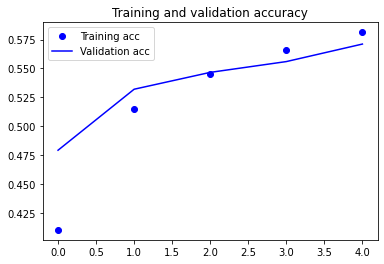

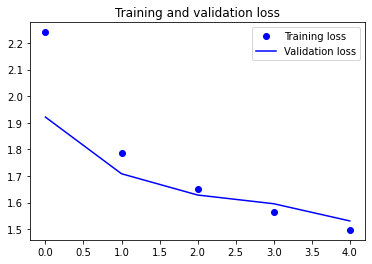

In [142]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Best Wishes


## Again: Delivery through this [form](https://forms.gle/PshJQw2bTa48Ligz7)